# **Análisis de Datos para Dashboard de Ventas**
## **Autor:** Andrés Ulloa Jaramillo

El presente proyecto comprende un análisis de datos general o inicial para una empresa dedicada a brindar soluciones tecnológicas. Se enfoca en comparar las ventas del 2022 vs 2023 para tres ciudades distintas donde opera la empresa.

## **Importar librerías**

In [1]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## **Cargar el conjunto de datos**

El conjunto de datos fue obtenido del repositorio de Sven Bosau en GitHub.

Para más información, se puede visitar el siguiente enlace: https://github.com/Sven-Bo/datasets/tree/master 

In [2]:
# Dataset URL
DATA_URL = "https://raw.githubusercontent.com/Sven-Bo/datasets/master/store_sales_2022-2023.csv"

# Cargar dataset
data = pd.read_csv(DATA_URL)

## **Información básica del conjunto de datos**

In [3]:
# Visualizar la información básica del conjunto de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          1730 non-null   int64  
 1   product_id        1730 non-null   int64  
 2   store_id          1730 non-null   int64  
 3   product_name      1730 non-null   object 
 4   product_category  1730 non-null   object 
 5   city              1730 non-null   object 
 6   date_of_sale      1730 non-null   object 
 7   quantity_sold     1730 non-null   int64  
 8   sales_amount      1730 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 121.8+ KB


In [4]:
# Visualizar las primeras filas del conjunto de datos
data.head()

,order_id,product_id,store_id,product_name,product_category,city,date_of_sale,quantity_sold,sales_amount
0,1,52,1,CodeComet,Software Development Tools,Tokyo,1/1/2022,8,303.29
1,2,83,3,SyntaxScribe,Software Development Tools,Yokohama,1/1/2022,8,173.53
2,3,24,3,CodeCanvas,Software Development Tools,Yokohama,1/2/2022,6,37.72
3,4,88,2,VarVista Pro,Educational Tools,Osaka,1/2/2022,6,10.47
4,5,60,1,LoopLantern,Creative & Design Tools,Tokyo,1/3/2022,1,159.10


Podemos observar que el conjunto de datos cuenta con 1730 registros o filas y un total de 9 columnas. A simple vista, parecen no existir valores nulos o faltantes. Sin embargo, ciertas características parecen no tener el tipo de dato correcto; por ejemplo, la variable de "date_of_sale" debería estar configurada como tipo datetime. Más adelante se corregirán estos aspectos.

Por otro lado, es importante describir las variables contenidas:
- order_id: Identificador único para cada pedido.
- product_id: Identificador único para cada producto.
- store_id: Identificador único para cada tienda.
- product_name: Nombre del producto vendido.
- product_category: Categoría a la que pertenece cada producto.
- city: Ciudad en la que se realizó la venta.
- date_of_sale: Fecha en la que se realizó la venta. Esta columna debería transformarse a un tipo de dato de fecha (datetime) para facilitar análisis temporales.
- quantity_sold: Cantidad de productos vendidos en un pedido.
- sales_amount: Importe total de la venta para un pedido (en una moneda no especificada).

## **Limpiar y transformar los datos**

Tras haber revisado el conjunto de datos. Vamos a proceder a transformar la variable de date_of_sale a un tipo datetime. Además, vamos a extraer el mes y el año de la columna de fecha de venta.

In [5]:
# Cambiar tipo de dato y extraer mes y año
data = data.assign(
    date_of_sale=lambda df: pd.to_datetime(df['date_of_sale']),
    month=lambda df: df['date_of_sale'].dt.month,
    year=lambda df: df['date_of_sale'].dt.year
)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1730 entries, 0 to 1729
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          1730 non-null   int64         
 1   product_id        1730 non-null   int64         
 2   store_id          1730 non-null   int64         
 3   product_name      1730 non-null   object        
 4   product_category  1730 non-null   object        
 5   city              1730 non-null   object        
 6   date_of_sale      1730 non-null   datetime64[ns]
 7   quantity_sold     1730 non-null   int64         
 8   sales_amount      1730 non-null   float64       
 9   month             1730 non-null   int32         
 10  year              1730 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(4), object(3)
memory usage: 135.3+ KB


In [7]:
data.head()

,order_id,product_id,store_id,product_name,product_category,city,date_of_sale,quantity_sold,sales_amount,month,year
0,1,52,1,CodeComet,Software Development Tools,Tokyo,2022-01-01,8,303.29,1,2022
1,2,83,3,SyntaxScribe,Software Development Tools,Yokohama,2022-01-01,8,173.53,1,2022
2,3,24,3,CodeCanvas,Software Development Tools,Yokohama,2022-01-02,6,37.72,1,2022
3,4,88,2,VarVista Pro,Educational Tools,Osaka,2022-01-02,6,10.47,1,2022
4,5,60,1,LoopLantern,Creative & Design Tools,Tokyo,2022-01-03,1,159.10,1,2022


## **Explorar y analizar los datos**

Vamos a partir por analizar las ventas o ingresos totales para cada ciudad y año.

In [8]:
YEAR = 2023

# Calcular los ingresos totales para cada ciudad y año, junto con el respectivo cambio porcentual
city_revenues = (
    data.groupby(['city', 'year'])['sales_amount']
    .sum()
    .unstack()
    .assign(change=lambda x: x.pct_change(axis=1)[YEAR] * 100)
)

city_revenues

year,2022,2023,change
city,,,
Osaka,76914.92,81202.93,5.575004
Tokyo,79961.13,72717.66,-9.058739
Yokohama,63216.90,67110.89,6.159729


Se observa que las ciudades de Osaka y Yokohama experimentaron un crecimiento en las ventas de 2022 a 2023; donde Yokohama lidera en crecimiento porcentual, a pesar de que sus ingresos son inferiores que las otras ciudades. Resulta importante investigar qué factores impulsaron este aumento y revisar si es aplicable para otras ciudades.

Por otro lado, Tokio presentó una disminución preocupante en los ingresos; por lo que es necesario identificar las razones detrás de esta caída. Definitivamente es un punto de atención para investigar.

### **Caso Yokohama:**

In [9]:
# Obtener ingresos y cambio porcentual para una única ciudad
city = "Yokohama"

revenue = city_revenues.loc[city, YEAR]
change = city_revenues.loc[city, "change"]

f"Revenue for {city}: ${revenue:,.2f}, Change: {change:.2f}%"

'Revenue for Yokohama: $67,110.89, Change: 6.16%'

In [10]:
# Ver ingresos mes por mes para una única ciudad y un año específico
selected_city = "Yokohama"
visualization_year = 2023

filtered_data = (
    data.query("city == @selected_city & year == @visualization_year")
    .groupby("month", dropna=False, as_index=False)["sales_amount"]
    .sum()
)

filtered_data

,month,sales_amount
0,1,8391.43
1,2,6449.30
2,3,5802.32
3,4,6587.28
4,5,8189.35
5,6,5500.01
6,7,7427.83
7,8,5386.17
8,9,2488.30
9,10,4207.68


In [11]:
# Comparación de total ventas por mes 2022 vs 2023 (tabla)

# Filtrar los datos para la ciudad de Yokohama
yokohama_data = data[data['city'] == 'Yokohama']

# Agrupar los datos por año y mes, y calcular las ventas totales
monthly_sales = yokohama_data.groupby(['year', 'month'])['sales_amount'].sum().unstack(level=0)

# Renombrar las columnas para mayor claridad
monthly_sales.columns = ['Ventas 2022', 'Ventas 2023']

# Llenar valores faltantes con 0 (en caso de meses sin ventas)
monthly_sales = monthly_sales.fillna(0)

# Calcular el cambio porcentual y agregarlo como una nueva columna
monthly_sales['% Change'] = round(((monthly_sales['Ventas 2023'] - monthly_sales['Ventas 2022']) / 
                             monthly_sales['Ventas 2022']),2)

# Mostrar la tabla comparativa
monthly_sales

,Ventas 2022,Ventas 2023,% Change
month,,,
1,4688.48,8391.43,0.79
2,2744.06,6449.30,1.35
3,4391.41,5802.32,0.32
4,5927.07,6587.28,0.11
5,3158.03,8189.35,1.59
6,4485.41,5500.01,0.23
7,3735.64,7427.83,0.99
8,6769.89,5386.17,-0.20
9,6275.50,2488.30,-0.60


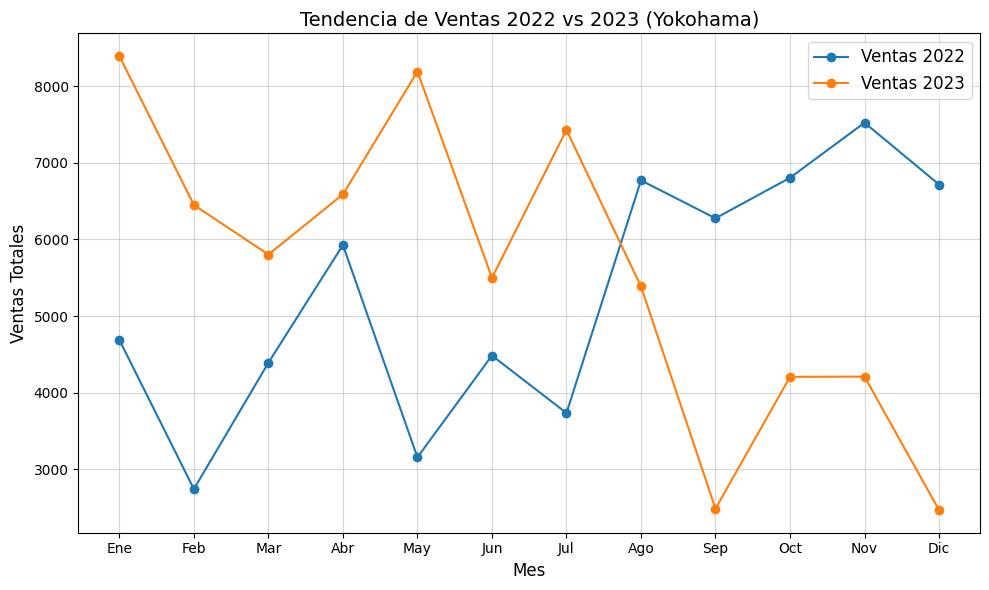

In [12]:
# Comparación de total ventas por mes 2022 vs 2023 (gráfica)

# Crear la gráfica de líneas para comparar tendencias
plt.figure(figsize=(10, 6))

# Línea para el año 2022
plt.plot(monthly_sales.index, monthly_sales['Ventas 2022'], marker='o', label='Ventas 2022')

# Línea para el año 2023
plt.plot(monthly_sales.index, monthly_sales['Ventas 2023'], marker='o', label='Ventas 2023')

# Personalización de la gráfica
plt.title('Tendencia de Ventas 2022 vs 2023 (Yokohama)', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ventas Totales', fontsize=12)
plt.xticks(monthly_sales.index, labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(fontsize=12)
plt.grid(alpha=0.5)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

Yokohama fue previamente identificada como la ciudad con el mayor cambio porcentual (positivo) considerando el total de ventas del año 2022 vs el total de ventas del año 2023. Sin embargo, al revisar esta información a un mayor nivel de detalle, considerando las ventas mes por mes, nos podemos dar cuenta de un comportamiento interesante.

Es evidente que los primeros meses del año muestran un comportamiento significativamente mejor en 2023, comparado con el rendimiento del año anterior. De hecho, el cambio porcentual positivo para el 2023 se mantiene prácticamente para la primera mitad del año. No obstante, a partir del mes de agosto se dió una caída significativa en las ventas del año 2023, lo que podría estar relacionado con factores internos o externos. Dicho bajón es crítico especialmente en septiembre y diciembre, lo cual es preocupante y se debería revisar detenidamente.

Por otro lado, se puede destacar que el desempeño de ciertos meses parece estar influenciado por factores estacionales; sin embargo, no se logra identificar patrones claros.

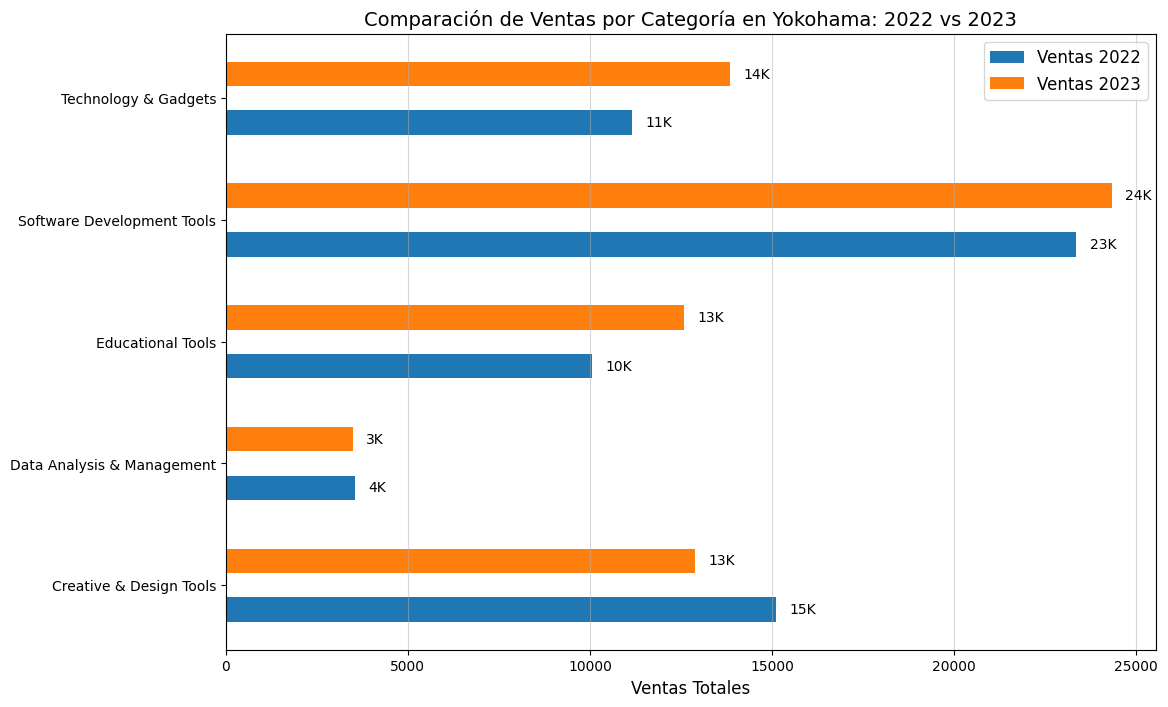

In [13]:
# Filtrar los datos por la ciudad seleccionada
selected_city = "Yokohama"
filtered_data = data[data['city'] == selected_city]

# Agrupar por categoría de producto y año, y calcular las ventas totales
sales_by_category = filtered_data.groupby(['product_category', 'year'])['sales_amount'].sum().unstack(level=1).fillna(0)

# Renombrar columnas para mayor claridad
sales_by_category.columns = ['Ventas 2022', 'Ventas 2023']

# Crear el gráfico de barras horizontales
fig, ax = plt.subplots(figsize=(12, 8))

# Crear posiciones para las barras
categories = sales_by_category.index
y_pos = np.arange(len(categories))

# Dibujar barras para 2022
bars_2022 = ax.barh(y_pos - 0.2, sales_by_category['Ventas 2022'], height=0.2, label='Ventas 2022')

# Dibujar barras para 2023
bars_2023 = ax.barh(y_pos + 0.2, sales_by_category['Ventas 2023'], height=0.2, label='Ventas 2023')

# Agregar etiquetas a las barras para 2022
for bar in bars_2022:
    ax.text(
        bar.get_width() + 370,  # Posición en X (ajustada para evitar superposición)
        bar.get_y() + bar.get_height() / 2,  # Posición en Y
        f'{bar.get_width() / 1000:.0f}K',  # Formato en miles con una decimal
        va='center', fontsize=10
    )

# Agregar etiquetas a las barras para 2023
for bar in bars_2023:
    ax.text(
        bar.get_width() + 370,  # Posición en X (ajustada para evitar superposición)
        bar.get_y() + bar.get_height() / 2,  # Posición en Y
        f'{bar.get_width() / 1000:.0f}K',  # Formato en miles con una decimal
        va='center', fontsize=10
    )

# Personalizar el gráfico
ax.set_yticks(y_pos)
ax.set_yticklabels(categories)
ax.set_xlabel('Ventas Totales', fontsize=12)
ax.set_title(f"Comparación de Ventas por Categoría en {selected_city}: 2022 vs 2023", fontsize=14)
ax.legend(fontsize=12)
ax.grid(axis='x', alpha=0.5)

plt.show()

El gráfico refleja una tendencia general hacia el crecimiento en categorías relacionadas con la tecnología, el desarrollo de software y educativas en Yokohama, mientras que herramientas de análisis de datos y creativas parecen haber perdido un poco de popularidad en 2023. No obstante, es importante recordar que al analizar las ventas mes por mes del 2023 comparado con las del 2022, se pudo observar que fueron los primeros meses del año (2023) los que despuntaron, mientras que la segunda mitad del 2023 fue mucho peor que la del año 2022. En este sentido, es probable que la tendencia general hacia el crecimiento vista en las categorías de producto, se explique por los primeros meses exitosos del 2023, pero es muy probable que los meses finales del 2023 todas o la mayoría de categorías hayan caído en ventas. Por ello, sería importante realizar un análisis más cuidadoso y detallado.

### **Caso Osaka:**

In [14]:
# Obtener ingresos y cambio porcentual para una única ciudad
city = "Osaka"

revenue = city_revenues.loc[city, YEAR]
change = city_revenues.loc[city, "change"]

f"Revenue for {city}: ${revenue:,.2f}, Change: {change:.2f}%"

'Revenue for Osaka: $81,202.93, Change: 5.58%'

In [15]:
# Ver ingresos mes por mes para una única ciudad y un año específico
selected_city = "Osaka"
visualization_year = 2023

filtered_data = (
    data.query("city == @selected_city & year == @visualization_year")
    .groupby("month", dropna=False, as_index=False)["sales_amount"]
    .sum()
)

filtered_data

,month,sales_amount
0,1,6861.28
1,2,5265.53
2,3,7863.93
3,4,7353.81
4,5,8137.12
5,6,10526.81
6,7,7524.98
7,8,5179.17
8,9,6609.86
9,10,3505.67


In [16]:
# Comparación de total ventas por mes 2022 vs 2023 (tabla)

# Filtrar los datos para la ciudad de Osaka
osaka_data = data[data['city'] == 'Osaka']

# Agrupar los datos por año y mes, y calcular las ventas totales
monthly_sales = osaka_data.groupby(['year', 'month'])['sales_amount'].sum().unstack(level=0)

# Renombrar las columnas para mayor claridad
monthly_sales.columns = ['Ventas 2022', 'Ventas 2023']

# Llenar valores faltantes con 0 (en caso de meses sin ventas)
monthly_sales = monthly_sales.fillna(0)

# Calcular el cambio porcentual y agregarlo como una nueva columna
monthly_sales['% Change'] = round(((monthly_sales['Ventas 2023'] - monthly_sales['Ventas 2022']) / 
                             monthly_sales['Ventas 2022']),2)

# Mostrar la tabla comparativa
monthly_sales

,Ventas 2022,Ventas 2023,% Change
month,,,
1,3611.27,6861.28,0.90
2,4760.46,5265.53,0.11
3,7059.33,7863.93,0.11
4,5346.73,7353.81,0.38
5,5659.02,8137.12,0.44
6,6151.57,10526.81,0.71
7,7895.83,7524.98,-0.05
8,7696.32,5179.17,-0.33
9,7139.95,6609.86,-0.07


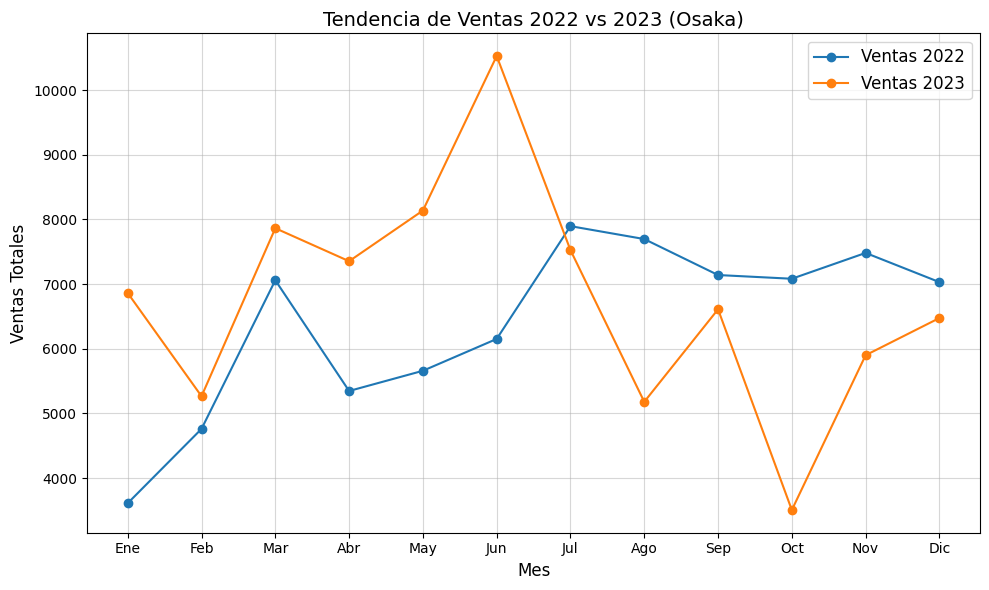

In [17]:
# Comparación de total ventas por mes 2022 vs 2023 (gráfica)

# Crear la gráfica de líneas para comparar tendencias
plt.figure(figsize=(10, 6))

# Línea para el año 2022
plt.plot(monthly_sales.index, monthly_sales['Ventas 2022'], marker='o', label='Ventas 2022')

# Línea para el año 2023
plt.plot(monthly_sales.index, monthly_sales['Ventas 2023'], marker='o', label='Ventas 2023')

# Personalización de la gráfica
plt.title('Tendencia de Ventas 2022 vs 2023 (Osaka)', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ventas Totales', fontsize=12)
plt.xticks(monthly_sales.index, labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(fontsize=12)
plt.grid(alpha=0.5)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

Con respecto a la ciudad de Osaka, podemos observar resultados positivos en la primera mitad del año (enero a junio), especialmente para el mes de enero, donde se evidenció un cambio porcentual positivo de +90%, lo que sugiere estrategias efectivas o una alta demanda en el mercado. Sin embargo, la segunda mitad del año presentó una tendencia a la baja, con caídas notables en varios meses.

El desempeño positivo en los primeros meses destaca la importancia de replicar estrategias exitosas. Sin embargo, las caídas en la segunda mitad del año requieren una investigación detallada para identificar y abordar las causas. 

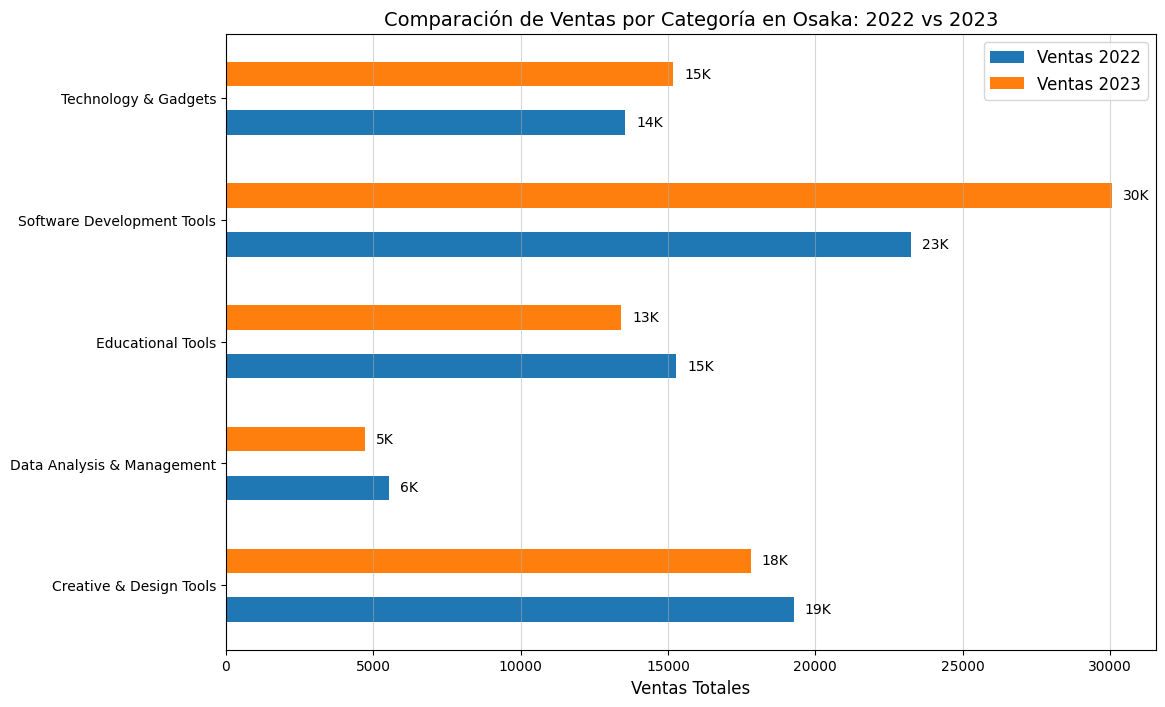

In [18]:
# Filtrar los datos por la ciudad seleccionada
selected_city = "Osaka"
filtered_data = data[data['city'] == selected_city]

# Agrupar por categoría de producto y año, y calcular las ventas totales
sales_by_category = filtered_data.groupby(['product_category', 'year'])['sales_amount'].sum().unstack(level=1).fillna(0)

# Renombrar columnas para mayor claridad
sales_by_category.columns = ['Ventas 2022', 'Ventas 2023']

# Crear el gráfico de barras horizontales
fig, ax = plt.subplots(figsize=(12, 8))

# Crear posiciones para las barras
categories = sales_by_category.index
y_pos = np.arange(len(categories))

# Dibujar barras para 2022
bars_2022 = ax.barh(y_pos - 0.2, sales_by_category['Ventas 2022'], height=0.2, label='Ventas 2022')

# Dibujar barras para 2023
bars_2023 = ax.barh(y_pos + 0.2, sales_by_category['Ventas 2023'], height=0.2, label='Ventas 2023')

# Agregar etiquetas a las barras para 2022
for bar in bars_2022:
    ax.text(
        bar.get_width() + 370,  # Posición en X (ajustada para evitar superposición)
        bar.get_y() + bar.get_height() / 2,  # Posición en Y
        f'{bar.get_width() / 1000:.0f}K',  # Formato en miles con una decimal
        va='center', fontsize=10
    )

# Agregar etiquetas a las barras para 2023
for bar in bars_2023:
    ax.text(
        bar.get_width() + 370,  # Posición en X (ajustada para evitar superposición)
        bar.get_y() + bar.get_height() / 2,  # Posición en Y
        f'{bar.get_width() / 1000:.0f}K',  # Formato en miles con una decimal
        va='center', fontsize=10
    )

# Personalizar el gráfico
ax.set_yticks(y_pos)
ax.set_yticklabels(categories)
ax.set_xlabel('Ventas Totales', fontsize=12)
ax.set_title(f"Comparación de Ventas por Categoría en {selected_city}: 2022 vs 2023", fontsize=14)
ax.legend(fontsize=12)
ax.grid(axis='x', alpha=0.5)

plt.show()

Se puede observar una tendencia general hacia el crecimiento de categorías relacionadas con la tecnología y el desarrollo de software, mientras que herramientas educativas, creativas y análisis de datos parecen haber perdido popularidad en 2023. En general, es un comportamiento un tanto similar a la ciudad de Yokohama. Es importante recordar que al analizar las ventas mensuales del año 2023, comparado con las del 2022, se pudo observar que fueron los primeros meses del año (2023) los que despuntaron, mientras que la segunda mitad del 2023 fue mucho peor que la del 2022. De este modo, es probable que la tendencia general hacia el crecimiento vista en ciertas categorías de producto, se expliqué por los primeros meses exitosos del 2023, pero es muy probable que los meses finales del 2023 todas o la mayoría de categorías hayan caído en ventas. Por ello, sería importante realizar un análisis más cuidadoso y detallado.

### **Caso Tokyo:**

In [19]:
# Obtener ingresos y cambio porcentual para una única ciudad
city = "Tokyo"

revenue = city_revenues.loc[city, YEAR]
change = city_revenues.loc[city, "change"]

f"Revenue for {city}: ${revenue:,.2f}, Change: {change:.2f}%"

'Revenue for Tokyo: $72,717.66, Change: -9.06%'

In [20]:
# Ver ingresos mes por mes para una única ciudad y un año específico
selected_city = "Tokyo"
visualization_year = 2023

filtered_data = (
    data.query("city == @selected_city & year == @visualization_year")
    .groupby("month", dropna=False, as_index=False)["sales_amount"]
    .sum()
)

filtered_data

,month,sales_amount
0,1,7289.70
1,2,6281.59
2,3,6568.99
3,4,6307.56
4,5,5881.92
5,6,4662.89
6,7,6116.09
7,8,5553.45
8,9,5327.64
9,10,8650.56


In [21]:
# Comparación de total ventas por mes 2022 vs 2023 (tabla)

# Filtrar los datos para la ciudad de Tokyo
tokyo_data = data[data['city'] == 'Tokyo']

# Agrupar los datos por año y mes, y calcular las ventas totales
monthly_sales = tokyo_data.groupby(['year', 'month'])['sales_amount'].sum().unstack(level=0)

# Renombrar las columnas para mayor claridad
monthly_sales.columns = ['Ventas 2022', 'Ventas 2023']

# Llenar valores faltantes con 0 (en caso de meses sin ventas)
monthly_sales = monthly_sales.fillna(0)

# Calcular el cambio porcentual y agregarlo como una nueva columna
monthly_sales['% Change'] = round(((monthly_sales['Ventas 2023'] - monthly_sales['Ventas 2022']) / 
                             monthly_sales['Ventas 2022']),2)

# Mostrar la tabla comparativa
monthly_sales

,Ventas 2022,Ventas 2023,% Change
month,,,
1,6150.13,7289.70,0.19
2,5516.61,6281.59,0.14
3,6254.65,6568.99,0.05
4,3465.85,6307.56,0.82
5,6329.75,5881.92,-0.07
6,5480.95,4662.89,-0.15
7,4158.16,6116.09,0.47
8,7206.05,5553.45,-0.23
9,7862.70,5327.64,-0.32


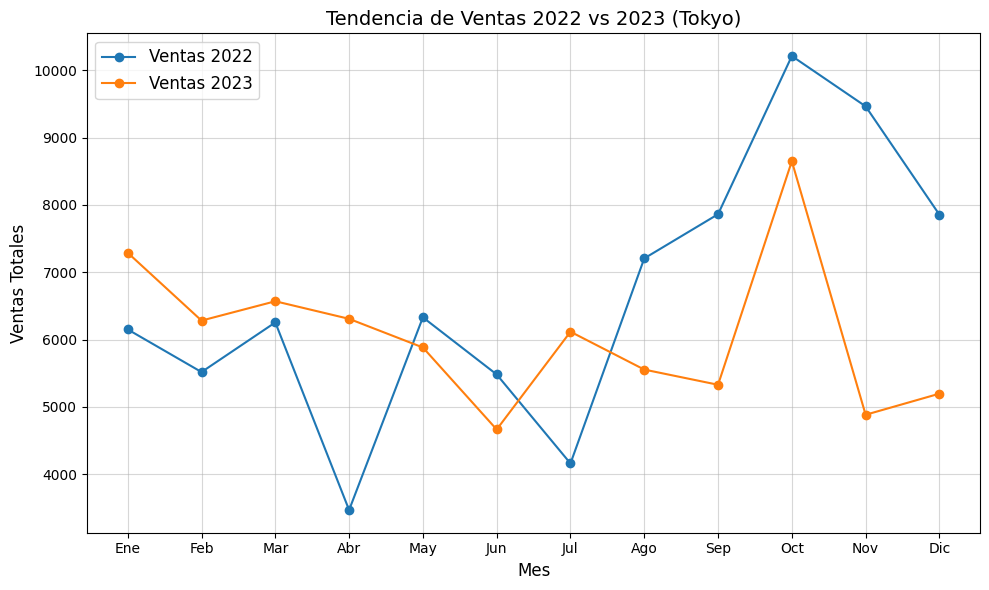

In [22]:
# Comparación de total ventas por mes 2022 vs 2023 (gráfica)

# Crear la gráfica de líneas para comparar tendencias
plt.figure(figsize=(10, 6))

# Línea para el año 2022
plt.plot(monthly_sales.index, monthly_sales['Ventas 2022'], marker='o', label='Ventas 2022')

# Línea para el año 2023
plt.plot(monthly_sales.index, monthly_sales['Ventas 2023'], marker='o', label='Ventas 2023')

# Personalización de la gráfica
plt.title('Tendencia de Ventas 2022 vs 2023 (Tokyo)', fontsize=14)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ventas Totales', fontsize=12)
plt.xticks(monthly_sales.index, labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.legend(fontsize=12)
plt.grid(alpha=0.5)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

En Tokyo, las ventas de 2023 mostraron un desempeño mixto en comparación con 2022. Los primeros meses (enero a marzo) registraron un crecimiento ligero pero positivo. Sin embargo, a partir de mayo, las ventas comenzaron a caer en varios meses importantes, como agosto (-23%), septiembre (-32%), y especialmente en noviembre (-48%) y diciembre (-34%).

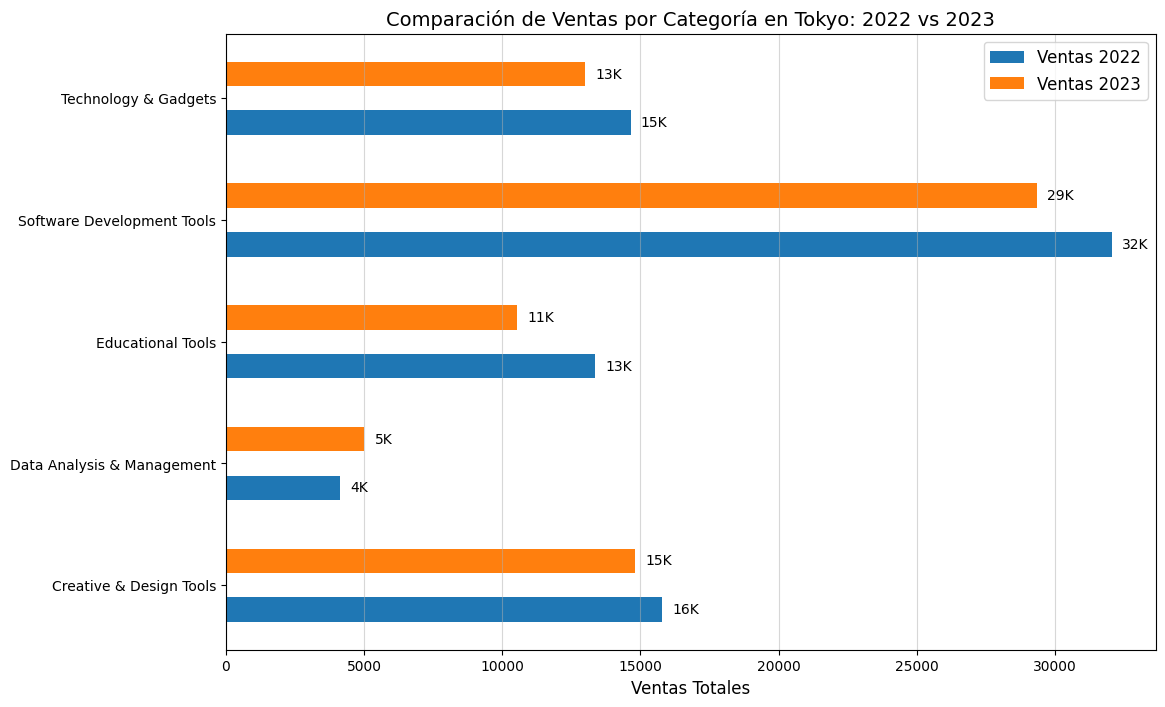

In [23]:
# Filtrar los datos por la ciudad seleccionada
selected_city = "Tokyo"
filtered_data = data[data['city'] == selected_city]

# Agrupar por categoría de producto y año, y calcular las ventas totales
sales_by_category = filtered_data.groupby(['product_category', 'year'])['sales_amount'].sum().unstack(level=1).fillna(0)

# Renombrar columnas para mayor claridad
sales_by_category.columns = ['Ventas 2022', 'Ventas 2023']

# Crear el gráfico de barras horizontales
fig, ax = plt.subplots(figsize=(12, 8))

# Crear posiciones para las barras
categories = sales_by_category.index
y_pos = np.arange(len(categories))

# Dibujar barras para 2022
bars_2022 = ax.barh(y_pos - 0.2, sales_by_category['Ventas 2022'], height=0.2, label='Ventas 2022')

# Dibujar barras para 2023
bars_2023 = ax.barh(y_pos + 0.2, sales_by_category['Ventas 2023'], height=0.2, label='Ventas 2023')

# Agregar etiquetas a las barras para 2022
for bar in bars_2022:
    ax.text(
        bar.get_width() + 370,  # Posición en X (ajustada para evitar superposición)
        bar.get_y() + bar.get_height() / 2,  # Posición en Y
        f'{bar.get_width() / 1000:.0f}K',  # Formato en miles con una decimal
        va='center', fontsize=10
    )

# Agregar etiquetas a las barras para 2023
for bar in bars_2023:
    ax.text(
        bar.get_width() + 370,  # Posición en X (ajustada para evitar superposición)
        bar.get_y() + bar.get_height() / 2,  # Posición en Y
        f'{bar.get_width() / 1000:.0f}K',  # Formato en miles con una decimal
        va='center', fontsize=10
    )

# Personalizar el gráfico
ax.set_yticks(y_pos)
ax.set_yticklabels(categories)
ax.set_xlabel('Ventas Totales', fontsize=12)
ax.set_title(f"Comparación de Ventas por Categoría en {selected_city}: 2022 vs 2023", fontsize=14)
ax.legend(fontsize=12)
ax.grid(axis='x', alpha=0.5)

plt.show()

Se puede observar que todas las categorías parecen haber perdido popularidad en 2023. Sería importante realizar un análisis más cuidadoso y detallado para dar una explicación y solución a este comportamiento no deseado.

## **Conslusiones generales:**

En general, todas las ciudades analizadas muestran debilidad en la segunda mitad del año 2023, lo que contrasta con un inicio más estable y en algunos casos significativamente positivo. De hecho, el buen inicio de año en algunas ciudades camufla la drástica caida en los últimos meses del año, por lo cual ciertas ciudades incluso presentan un cambio porcentual positivo al considerar las ventas totales (suma de todo el año). Esto resalta la necesidad de analizar las causas detrás del desempeño decreciente en los meses finales.